In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from config import config
from utils import *
import torch

torch.set_float32_matmul_precision('medium')

# Check Data Module

In [2]:
from src import DenoiserDataModule
dm = DenoiserDataModule()

dm.setup(stage='fit')

In [4]:
dl = dm.train_dataloader()

In [5]:
batch = next(iter(dl))

In [6]:
X_noisy, X = batch
X_noisy.shape, X.shape

(torch.Size([4, 3, 254, 254]), torch.Size([4, 3, 254, 254]))

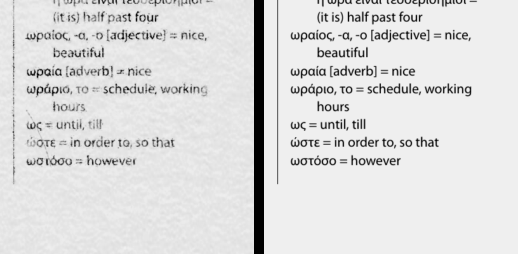

In [7]:
create_side_by_side_image(X_noisy[0], X[0])

# Check Model

In [8]:
from src import Denoiser
model = Denoiser()

In [9]:
out = model(X_noisy)
out.shape

torch.Size([4, 3, 240, 240])

In [10]:
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_trainable_params

31043651